In [1]:
# Based on https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html 

from face_recognizer.faceID import faceID
from face_recognizer.emotion_detection import create_model, emotionID
from face_recognizer.camera_to_image_array import camera_to_image_array as cam
from face_recognizer.dataface_funcs import dataface_add
from face_recognizer.getting_name_dataface import match_descriptor_in_dataface as lookup
from face_recognizer.image_array_to_descriptors import load_dlib as load
from face_recognizer.image_array_to_descriptors import match_image_to_descriptors as match
from face_recognizer.dataface_funcs import pickOpen
import numpy as np
import cv2

dataface = pickOpen("/Users/Jenny/Desktop/BWSI WORK/upgraded-octo-discocito-3/dataface/dataface.dat")
face_detect, face_rec_model, shape_predictor = load()
emotion_model = create_model("/Users/Jenny/Desktop/BWSI WORK/upgraded-octo-discocito-8/emotion_net_parameters.dat")

File already exists:
	/Users/Jenny/Desktop/BWSI WORK/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/Jenny/Desktop/BWSI WORK/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


AssertionError: Only 1 face is supported at this time.

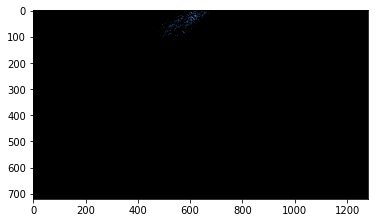

In [2]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Proccess the frame
    out, rect = match(face_detect, face_rec_model, shape_predictor, frame)
    names = lookup(dataface, out)
    ax = faceID(frame, rect, names)
    #emotion = emotionID(frame, ax, face_detect, shape_predictor, emotion_model)

    # Display the resulting frame
    cv2.imshow('frame', frame)
    
    # Quit by pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()